<a href="https://colab.research.google.com/github/akhilp90/Resource_monitor/blob/main/System_Resource_Monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install psutil matplotlib


In [3]:
import psutil
import datetime
import csv

LOG_FILE = 'resource_monitor.csv'


def initialize_log_file():
    with open(LOG_FILE, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Timestamp', 'CPU Usage (%)', 'Memory Usage (%)',
                         'Disk Usage (%)', 'Bytes Sent', 'Bytes Received'])


def monitor_resources():
    cpu = psutil.cpu_percent(interval=1)
    memory = psutil.virtual_memory().percent
    disk = psutil.disk_usage('/').percent
    net = psutil.net_io_counters()
    return {
        'timestamp': datetime.datetime.now(),
        'cpu': cpu,
        'memory': memory,
        'disk': disk,
        'bytes_sent': net.bytes_sent,
        'bytes_recv': net.bytes_recv
    }


def log_to_csv(data):
    with open(LOG_FILE, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([data['timestamp'], data['cpu'], data['memory'],
                         data['disk'], data['bytes_sent'], data['bytes_recv']])


initialize_log_file()


data = monitor_resources()
log_to_csv(data)
print(f"Logged data: {data}")


Logged data: {'timestamp': datetime.datetime(2024, 11, 20, 5, 19, 35, 889459), 'cpu': 30.8, 'memory': 9.1, 'disk': 30.2, 'bytes_sent': 5402137, 'bytes_recv': 4480330}


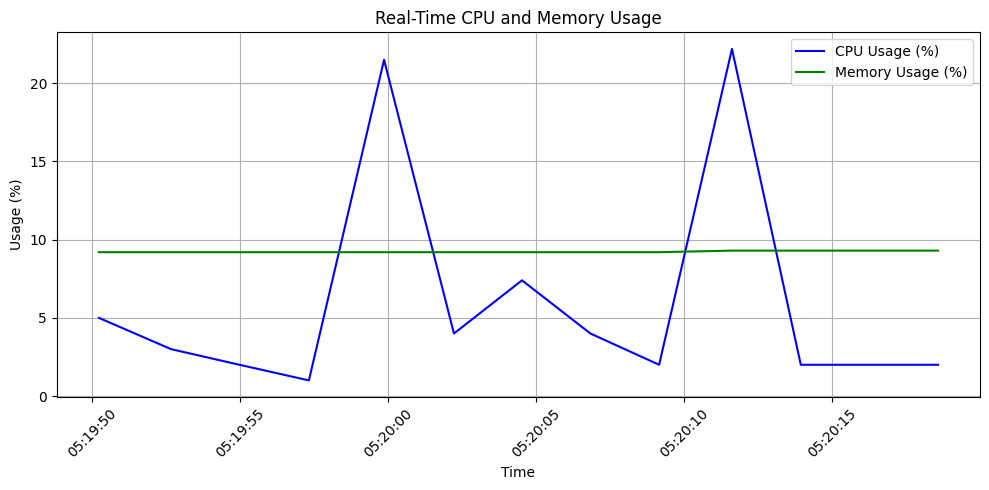

In [4]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

def real_time_plot(duration=30):
    timestamps = []
    cpu_usage = []
    memory_usage = []

    start_time = time.time()
    while time.time() - start_time < duration:
        data = monitor_resources()
        timestamps.append(data['timestamp'])
        cpu_usage.append(data['cpu'])
        memory_usage.append(data['memory'])


        clear_output(wait=True)
        plt.figure(figsize=(10, 5))


        plt.plot(timestamps, cpu_usage, label="CPU Usage (%)", color='blue')


        plt.plot(timestamps, memory_usage, label="Memory Usage (%)", color='green')

        plt.xlabel("Time")
        plt.ylabel("Usage (%)")
        plt.title("Real-Time CPU and Memory Usage")
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        time.sleep(1)


real_time_plot(duration=30)


In [5]:
import psutil


cpu_per_core = psutil.cpu_percent(percpu=True, interval=1)
network_stats = psutil.net_io_counters()
memory = psutil.virtual_memory()

disk = psutil.disk_usage('/')


print("CPU Usage per Core:", cpu_per_core)
print("Total Memory Usage: {}%".format(memory.percent))
print("Disk Usage: {}%".format(disk.percent))
print("Network - Bytes Sent:", network_stats.bytes_sent, "Bytes Received:", network_stats.bytes_recv)


CPU Usage per Core: [18.0, 19.6]
Total Memory Usage: 9.2%
Disk Usage: 30.2%
Network - Bytes Sent: 10086515 Bytes Received: 8126318


In [ ]:
def check_thresholds():
    data = monitor_resources()
    alerts = []

    if data['cpu'] > 80:
        alerts.append(f"⚠️ High CPU Usage: {data['cpu']}%")
    if data['memory'] > 85:
        alerts.append(f"⚠️ High Memory Usage: {data['memory']}%")
    if data['disk'] > 90:
        alerts.append(f"⚠️ High Disk Usage: {data['disk']}%")

    if alerts:
        print("\n".join(alerts))
    else:
        print("All systems are operating within normal limits.")


check_thresholds()


All systems are operating within normal limits.


In [ ]:
from google.colab import files


files.download(LOG_FILE)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>